<font size="5"><center> **Exercise 1.3** </center></font>
<font size="4"><center> CS-673 <br> Introduction to Deep Generative Models </center></font>
<font size="4"><center> Sifakis Emmanouil, *1288* </center></font>

---

↓ Imports ↓

In [71]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt

⇒ Question a

In [78]:
def ar(a0, a1, sigma, T, x_1=0):
    # AR(1) PROCESS
    time = np.arange(0, T)

    # NOISE
    np.random.seed(198)
    white_noise = np.random.normal(0, sigma, T)

    x = np.zeros(T)
    x[0] = x_1  # define the first sample

    # apply formula for id>0
    for t in time[1:]:
        x[t] = a0 + a1 * x[t - 1] + white_noise[t]

    return time, x, white_noise

In [79]:
# MAIN
# Initialize parameters
a0 = 2.0
a1 = -0.9
sigma = 1.0
T = 1000
x_1 = 0
seed = 198

# Simulate AR process
time, x, white_noise = ar(a0, a1, sigma, T, x_1)


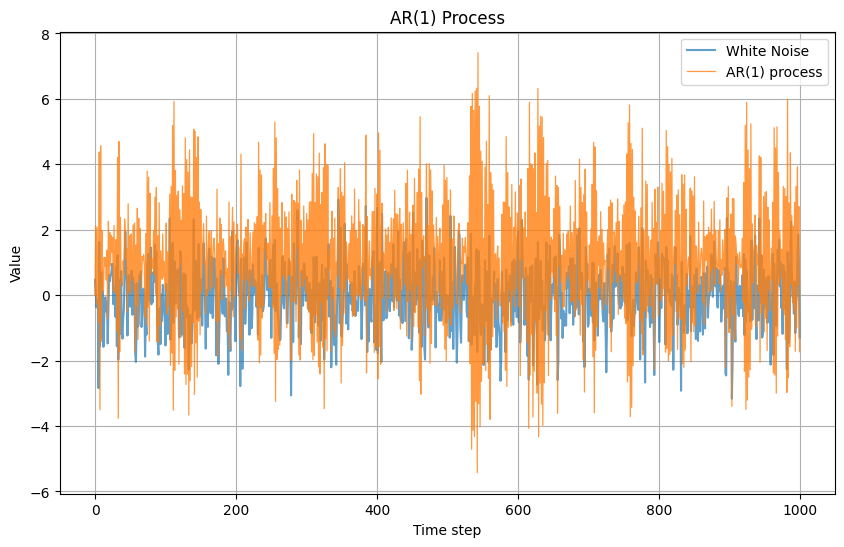

In [80]:
# Visualize the simulated AR(1) process
plt.figure(figsize=(10, 6))
plt.plot(time, white_noise,linewidth = 1.5, alpha=0.7,label='White Noise')
plt.plot(time, x, linewidth = 0.9, alpha=0.8,label='AR(1) process')
plt.xlabel('Time step')
plt.ylabel('Value')
plt.title('AR(1) Process')
plt.legend()
plt.grid(True)
plt.show()


As it was expected the plot with white noise fluctuates randomly around zero, where on the other hand AR(1) process oscillates around a mean value.
As it is observed the AR(1) process doesn't fully capture expected behavior.

⇒ Question c

In [76]:
# Define the log-likelihood function for AR(1) process
def log_likelihood(a0, a1, sigma, x):
    T = len(x)
    residual_sum_sq = np.sum((x[1:] - a0 - a1 * x[:-1])**2)
    return -(T - 1) / 2 * np.log(2 * np.pi * sigma**2) - 1 / (2 * sigma**2) * residual_sum_sq

def gradient(a0, a1, sigma, x):
    T = len(x)
    eps = 1e-6
    grad_a0 = np.sum((a0 + a1 * x[:-1] - x[1:]) / (sigma**2 + eps))
    grad_a1 = np.sum(x[:-1] * (a0 + a1 * x[:-1] - x[1:]) / (sigma**2 + eps))
    return grad_a0, grad_a1

# Gradient descent algorithm
def gradient_descent(x, learning_rate, num_iterations):
    a0 = 0.0  # Initial a0
    a1 = 0.0  # Initial a1
    sigma = 1.0
    for _ in range(num_iterations):
        grad_a0, grad_a1 = gradient(a0, a1, sigma, x)
        a0 -= learning_rate * grad_a0
        a1 -= learning_rate * grad_a1
    return a0, a1

def find_mse(truth, estimation):
  return np.mean((truth - estimation)**2)

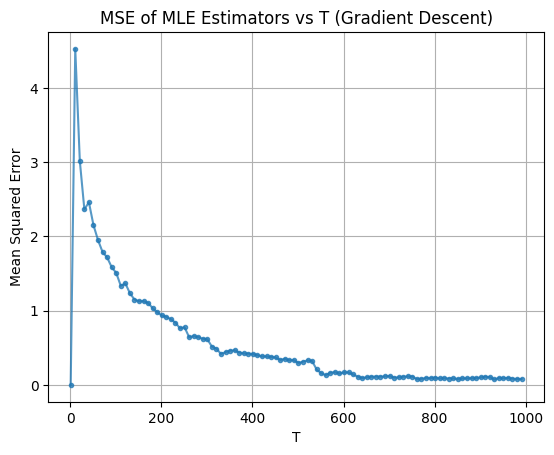

In [77]:
# MAIN
# Initialize parameters
T = 1000
steps = 10
T_values = np.arange(1, T+1, steps)
# Ground truth
a0_true = 2.0
a1_true = -0.9
# GD parameters
lr = 1e-5
num_iterations = 1000

mse_values = []
for T in T_values:
    time, x, white_noise = ar(a0, a1, sigma, T, x_1)

    # Estimators using gradient descent
    a0_est, a1_est = gradient_descent(x, lr, num_iterations)
    _, x_est, _ = ar(a0_est,a1_est, sigma, T, x_1)

    # Compute mean squared error
    mse = find_mse(x,x_est)
    mse_values.append(mse)

# Plot mean squared error as a function of T
plt.plot(T_values, mse_values, marker='o', markersize=3, alpha=0.75)
plt.xlabel('T')
plt.ylabel('Mean Squared Error')
plt.title('MSE of MLE Estimators vs T (Gradient Descent)')
plt.grid(True)
plt.show()

The plot above plot initially exhibits fluctuations in the mean squared error (MSE), however, with the progression of iterations in the gradient descent algorithm, the MSE converges to very low values. This convergence suggests that the MLE estimators obtained through gradient descent approach the true parameter values of the AR(1) process as the length of the time series increases. The decreasing trend in MSE with increasing T indicates that longer time series provide more reliable estimates of the parameters a0 and a1. This behavior aligns with expectations, as larger datasets typically lead to more accurate parameter estimation in statistical models.